In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Flight price Dataset.csv')
df.head()

,Unnamed: 0,Airline,Date of Journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
0,0,SpiceJet,27 Feb 2022,New Delhi,Mumbai,07:20,09:35,2h 15m,Non Stop,"5,953"
1,1,Air India,27 Feb 2022,New Delhi,Mumbai,07:00,09:05,2h 05m,Non Stop,"5,955"
2,2,Vistara,27 Feb 2022,New Delhi,Mumbai,09:30,11:35,2h 05m,Non Stop,"5,955"
3,3,IndiGo,27 Feb 2022,New Delhi,Mumbai,02:00,04:10,2h 10m,Non Stop,"5,955"
4,4,IndiGo,27 Feb 2022,New Delhi,Mumbai,06:30,08:40,2h 10m,Non Stop,"5,955"


In [3]:
df.shape

(1670, 10)

The dataset has 1670 rows and 10 columns.

In [4]:
df.isnull().sum()

Unnamed: 0           0
Airline            140
Date of Journey      0
Source             140
Destination        140
Departure Time     140
Arrival Time       140
Duration           140
Total Stops        140
Price              140
dtype: int64

140 null values present in Airline,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops and Price.

In [5]:
df.dtypes

Unnamed: 0          int64
Airline            object
Date of Journey    object
Source             object
Destination        object
Departure Time     object
Arrival Time       object
Duration           object
Total Stops        object
Price              object
dtype: object

All features data type is object type, need to change some of them to integer.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1670 non-null   int64 
 1   Airline          1530 non-null   object
 2   Date of Journey  1670 non-null   object
 3   Source           1530 non-null   object
 4   Destination      1530 non-null   object
 5   Departure Time   1530 non-null   object
 6   Arrival Time     1530 non-null   object
 7   Duration         1530 non-null   object
 8   Total Stops      1530 non-null   object
 9   Price            1530 non-null   object
dtypes: int64(1), object(9)
memory usage: 130.6+ KB


In [7]:
df.columns

Index(['Unnamed: 0', 'Airline', 'Date of Journey', 'Source', 'Destination',
       'Departure Time', 'Arrival Time', 'Duration', 'Total Stops', 'Price'],
      dtype='object')

<AxesSubplot:>

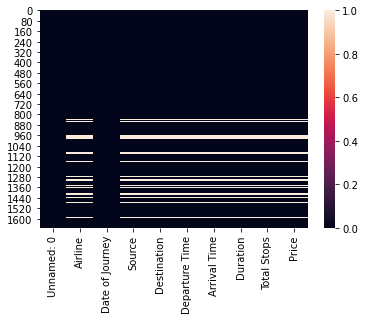

In [8]:
sns.heatmap(df.isnull())

In [9]:
df['Airline'].unique()

array(['SpiceJet', 'Air India', 'Vistara', 'IndiGo', 'Go First',
       'Air Asia', nan, 'AirAsia', 'IndiGo, AirAsia', 'AirAsia, IndiGo',
       'SpiceJet, Go First', 'IndiGo, Go First', 'Go First, IndiGo',
       'SpiceJet, AirAsia', 'SpiceJet, IndiGo', 'Go First, Air India'],
      dtype=object)

In [10]:
df['Source'].unique()

array(['New Delhi', 'Mumbai', 'Chennai', 'Bangalore', 'Hyderabad',
       'Kochi', 'Kolkata', 'Jaipur', 'Goa', 'Pune', 'Lucknow', nan,
       'Bengaluru', 'Kozhikode'], dtype=object)

In [11]:
df['Destination'].unique()

array(['Mumbai', 'Chennai', 'Bangalore', 'Hyderabad', 'Kochi', 'Kolkata',
       'Jaipur', 'Goa', 'Pune', 'Lucknow', 'New Delhi', 'Bengaluru', nan,
       'Coimbatore', 'Kozhikode'], dtype=object)

In [12]:
df['Total Stops'].unique()

array(['Non Stop', '1 Stop', '2 Stop(s)', '3 Stop(s)', '1 stop ',
       'Non stop', nan, '2 stop ', '3 stop '], dtype=object)

In [13]:
#Dropping the null values
df=df.dropna()
df

,Unnamed: 0,Airline,Date of Journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
0,0,SpiceJet,27 Feb 2022,New Delhi,Mumbai,07:20,09:35,2h 15m,Non Stop,"5,953"
1,1,Air India,27 Feb 2022,New Delhi,Mumbai,07:00,09:05,2h 05m,Non Stop,"5,955"
2,2,Vistara,27 Feb 2022,New Delhi,Mumbai,09:30,11:35,2h 05m,Non Stop,"5,955"
3,3,IndiGo,27 Feb 2022,New Delhi,Mumbai,02:00,04:10,2h 10m,Non Stop,"5,955"
4,4,IndiGo,27 Feb 2022,New Delhi,Mumbai,06:30,08:40,2h 10m,Non Stop,"5,955"
...,...,...,...,...,...,...,...,...,...,...
1665,1665,IndiGo,1 Mar 22,Chennai,Bengaluru,13:05,14:10,01 h 05 m,Non stop,"₹ 3,677"
1666,1666,AirAsia,1 Mar 22,Chennai,Bengaluru,16:05,17:00,55 m,Non stop,"₹ 3,783"
1667,1667,IndiGo,1 Mar 22,Chennai,Bengaluru,14:30,15:40,01 h 10 m,Non stop,"₹ 3,940"
1668,1668,IndiGo,1 Mar 22,Chennai,Bengaluru,20:50,22:00,01 h 10 m,Non stop,"₹ 4,097"


After dropping the null values the dataset has 1530 rows of data.

In [14]:
#Replacing Air asia
df['Airline']=df['Airline'].replace('AirAsia','Air Asia')

#Replacing the Bengaluru to Bangalore in Source and Destination
df['Source']=df['Source'].replace('Bengaluru','Bangalore')
df['Destination']=df['Source'].replace('Bengaluru','Bangalore')

In [15]:
#Replacing the total number of stops
df['Total Stops']=df['Total Stops'].replace(['Non Stop','Non stop'],0)
df['Total Stops']=df['Total Stops'].replace(['1 Stop','1 stop '],1)
df['Total Stops']=df['Total Stops'].replace(['2 Stop(s)','2 stop '],2)
df['Total Stops']=df['Total Stops'].replace(['3 Stop(s)','3 stop '],3)

In [16]:
#Date of Journey is object need to convert to datetime

df['Date of Journey']=pd.to_datetime(df['Date of Journey'])
df['Day of Journey']=df['Date of Journey'].apply(lambda x:x.day)
df['Month of Journey']=df['Date of Journey'].apply(lambda x:x.month)

In [17]:
#Converting the Dep Time from object to datetime.
df['Departure Time']=pd.to_datetime(df['Departure Time'])
df['Dep-Hour']=df['Departure Time'].apply(lambda x:x.hour)
df['Dep-Minute']=df['Departure Time'].apply(lambda x:x.minute)

In [18]:
#Converting the Arrival Time from object to datetime.
df['Arrival Time']=pd.to_datetime(df['Arrival Time'])
df['Arrival-Hour']=df['Arrival Time'].apply(lambda x:x.hour)
df['Arrival-Minute']=df['Arrival Time'].apply(lambda x:x.minute)

In [19]:
#Seperating Duration hour and Duration minute from Duration
Duration_hour=[]
Duration_minute=[]

Duration=list(df['Duration'])
for i in range(len(Duration)):
    if len(Duration[i].split()) !=2:
        Duration[i]=Duration[i].split()[0]+Duration[i].split()[1]+' '+Duration[i].split()[2]+Duration[i].split()[3]
    
    if len(Duration[i]) ==4:
        if 'h' in Duration[i]:
            Duration[i]=Duration[i].split()[0]+Duration[i].split()[1]+' '+'00m'
        else:
            Duration[i]='0h '+Duration[i].split()[0]+Duration[i].split()[1]
    if  len(Duration[i])==7:
        if Duration[i][0]=='0':
            Duration[i]=Duration[i][1:]
        
        

for i in range(len(Duration)):
    Duration_hour.append(int(Duration[i].split('h')[0]))
    Duration_minute.append(int(Duration[i].split('m')[0].split('h')[-1]))

In [20]:
#Adding Duration_hour and Duration_minute.
df['Duration Hour']=Duration_hour
df['Duration Minute']=Duration_minute

In [21]:
#Removing ',' from the Price column
Price=list(df['Price'])
for i in range(len(Price)):
    if len(Price[i].split()) >=2:
        Price[i]=Price[i].split()[1]
    if ',' in Price[i]:
        Price[i]=Price[i].split(',')[0]+Price[i].split(',')[1]
df['Price']=Price

In [22]:
#Price is object type changing to integer.
df['Price']=df['Price'].astype(int)

In [23]:
#Removing Unnamed: 0,Date of Journey,Departure Time,Arrival Time and Duration
df=df.drop(['Unnamed: 0','Date of Journey','Departure Time','Arrival Time','Duration'],axis=1)
df

,Airline,Source,Destination,Total Stops,Price,Day of Journey,Month of Journey,Dep-Hour,Dep-Minute,Arrival-Hour,Arrival-Minute,Duration Hour,Duration Minute
0,SpiceJet,New Delhi,New Delhi,0,5953,27,2,7,20,9,35,2,15
1,Air India,New Delhi,New Delhi,0,5955,27,2,7,0,9,5,2,5
2,Vistara,New Delhi,New Delhi,0,5955,27,2,9,30,11,35,2,5
3,IndiGo,New Delhi,New Delhi,0,5955,27,2,2,0,4,10,2,10
4,IndiGo,New Delhi,New Delhi,0,5955,27,2,6,30,8,40,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,IndiGo,Chennai,Chennai,0,3677,1,3,13,5,14,10,1,5
1666,Air Asia,Chennai,Chennai,0,3783,1,3,16,5,17,0,0,55
1667,IndiGo,Chennai,Chennai,0,3940,1,3,14,30,15,40,1,10
1668,IndiGo,Chennai,Chennai,0,4097,1,3,20,50,22,0,1,10


<AxesSubplot:>

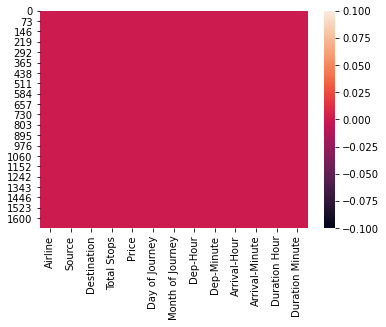

In [24]:
sns.heatmap(df.isnull())

Now no null value present in the dataset.

<AxesSubplot:>

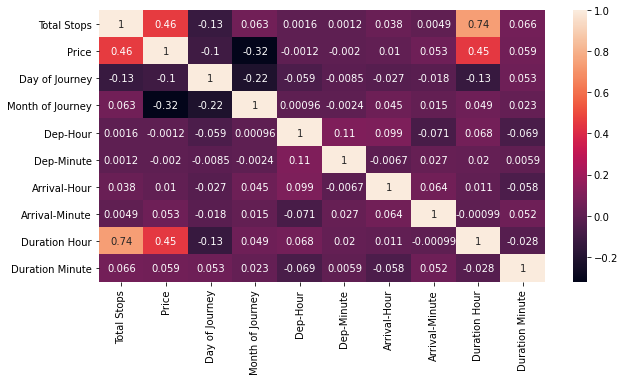

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

Total_Stops and Price is highly positive correlated.

Duration Hours and Total_Stops is highly positive correlated.

Price and Duration Hours is positive correlated.

The Price is positively correlated to Total_Stops,Arrival Hour,Arrival-minute,Duration Hour and Duration minute. The Price negatively correlated to Day of Journey,Month of Journey,Dep-Hour and Dep-Minute.

IndiGo                 754
Air India              211
Air Asia               201
Go First               155
Vistara                140
SpiceJet                50
IndiGo, AirAsia          4
SpiceJet, IndiGo         3
IndiGo, Go First         3
AirAsia, IndiGo          3
Go First, IndiGo         2
SpiceJet, AirAsia        2
SpiceJet, Go First       1
Go First, Air India      1
Name: Airline, dtype: int64

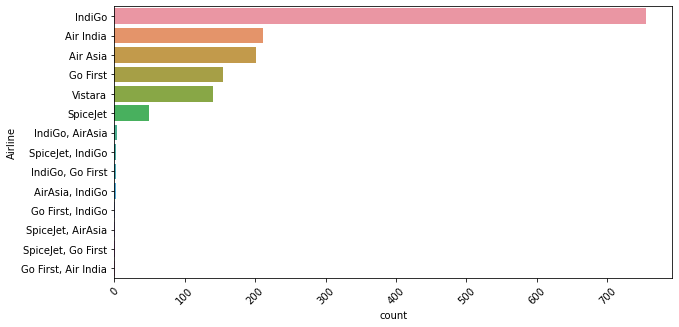

In [26]:
plt.figure(figsize=(10,5))
plt.xticks(rotation='45')
sns.countplot(y='Airline',data=df,order=df['Airline'].value_counts().sort_values(ascending=False).index)
df['Airline'].value_counts()

Chennai      230
Kolkata      190
New Delhi    169
Pune         168
Kochi        155
Hyderabad    150
Bangalore    138
Goa          115
Jaipur       100
Mumbai        75
Lucknow       25
Kozhikode     15
Name: Source, dtype: int64

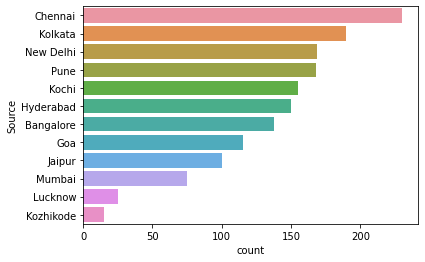

In [27]:
sns.countplot(y='Source',data=df,order=df['Source'].value_counts().sort_values(ascending=False).index)
df['Source'].value_counts()

Chennai      230
Kolkata      190
New Delhi    169
Pune         168
Kochi        155
Hyderabad    150
Bangalore    138
Goa          115
Jaipur       100
Mumbai        75
Lucknow       25
Kozhikode     15
Name: Destination, dtype: int64

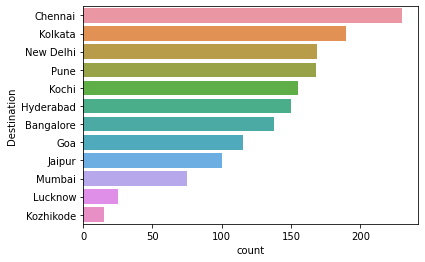

In [28]:
sns.countplot(y='Destination',data=df,order=df['Destination'].value_counts().sort_values(ascending=False).index,)
df['Destination'].value_counts()

<AxesSubplot:xlabel='Airline', ylabel='Price'>

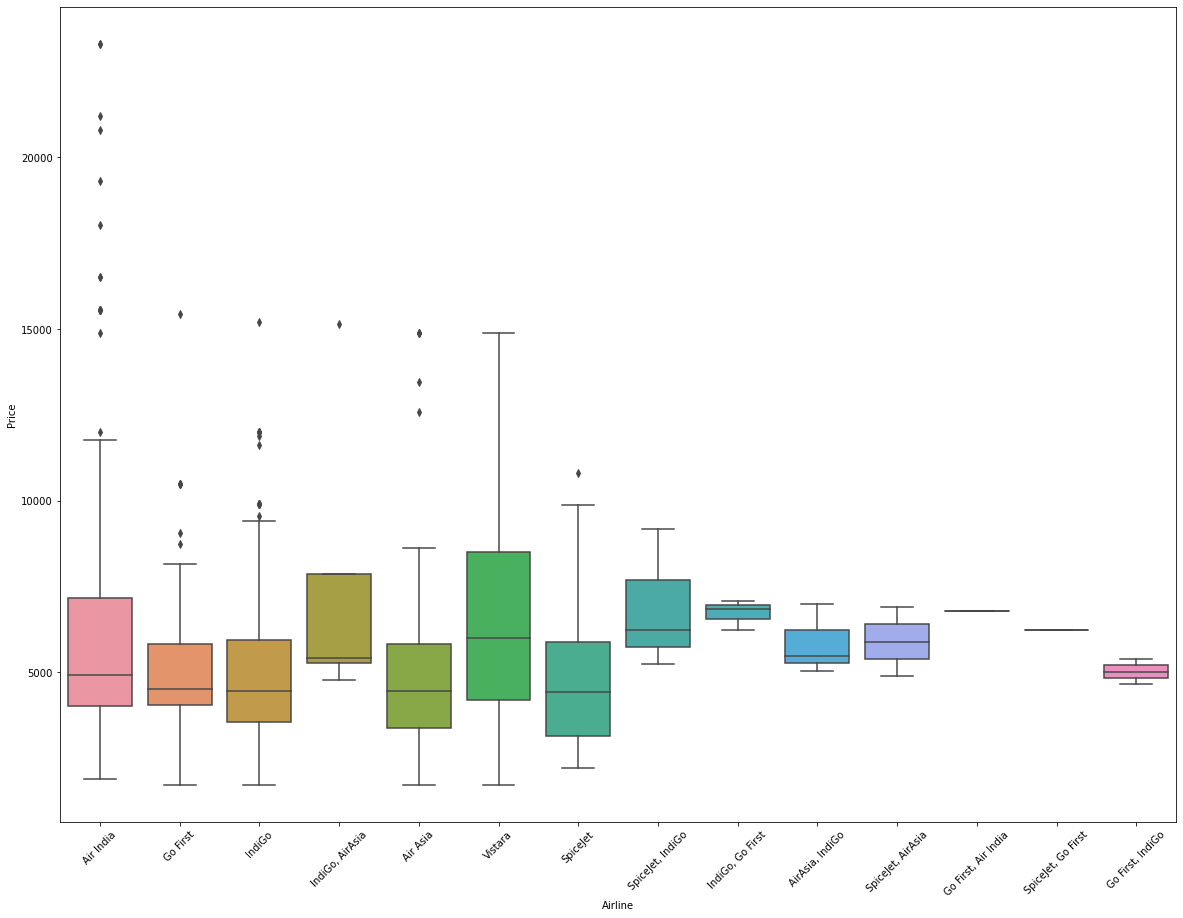

In [29]:
plt.figure(figsize=(20,15))
plt.xticks(rotation='45')
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

The Price range is higher in Air asia,Vistara and Spicejet compared to other airlines.



<AxesSubplot:xlabel='Source', ylabel='Price'>

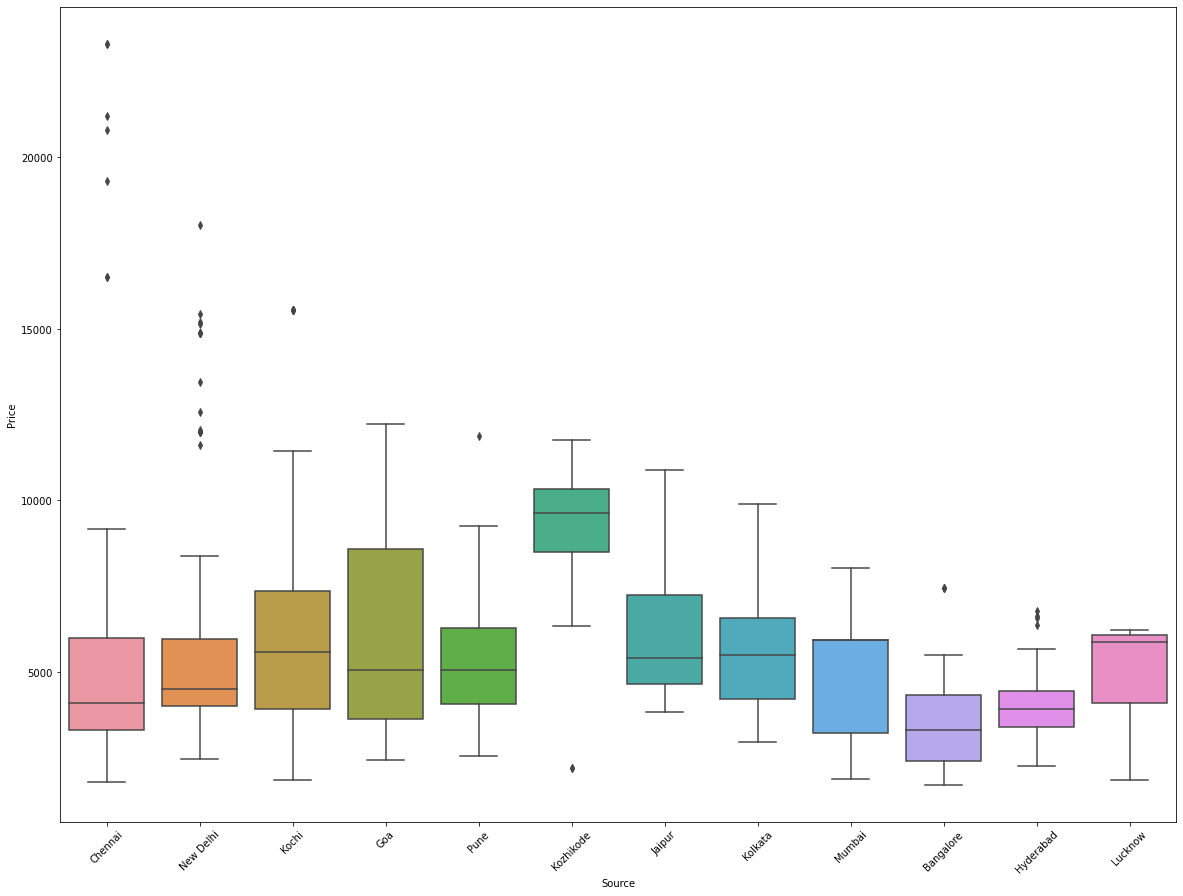

In [30]:
plt.figure(figsize=(20,15))
plt.xticks(rotation='45')
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Destination', ylabel='Price'>

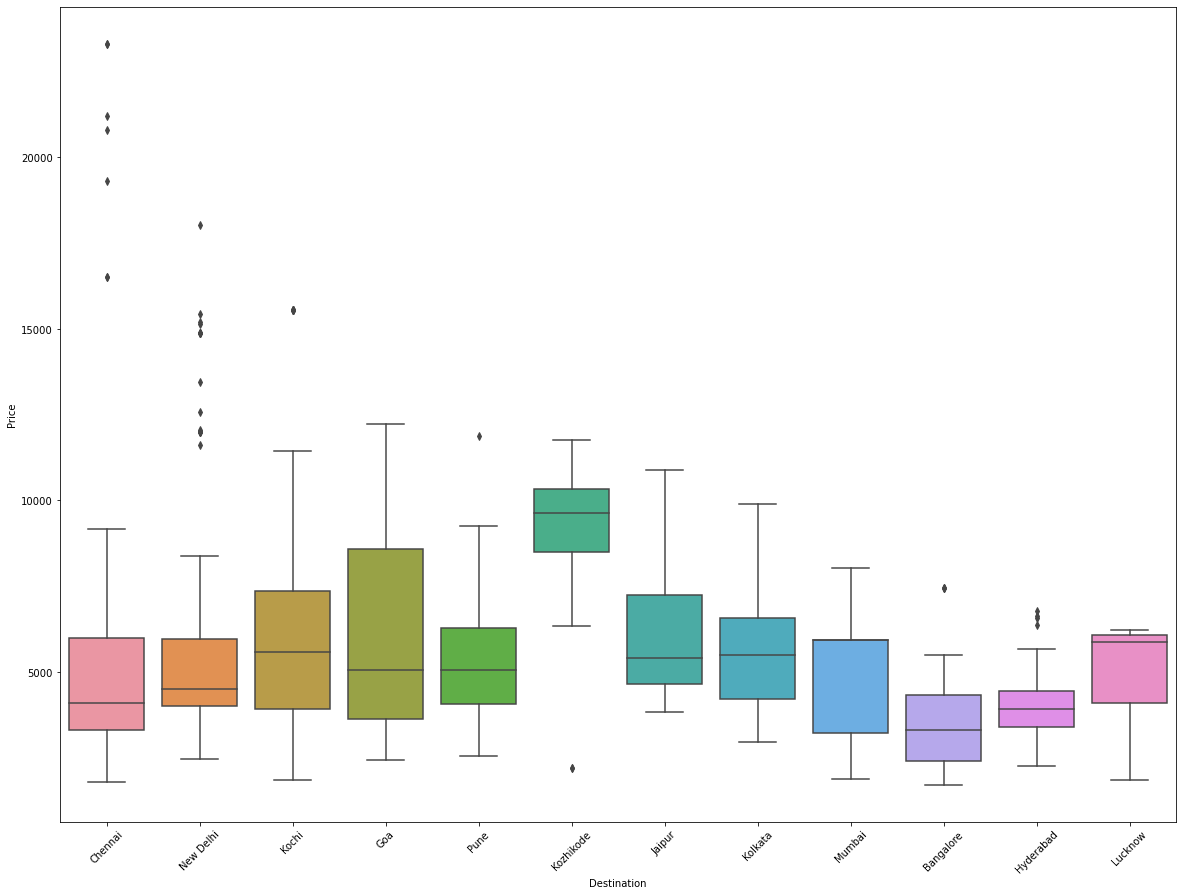

In [31]:
plt.figure(figsize=(20,15))
plt.xticks(rotation='45')
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total Stops', ylabel='Price'>

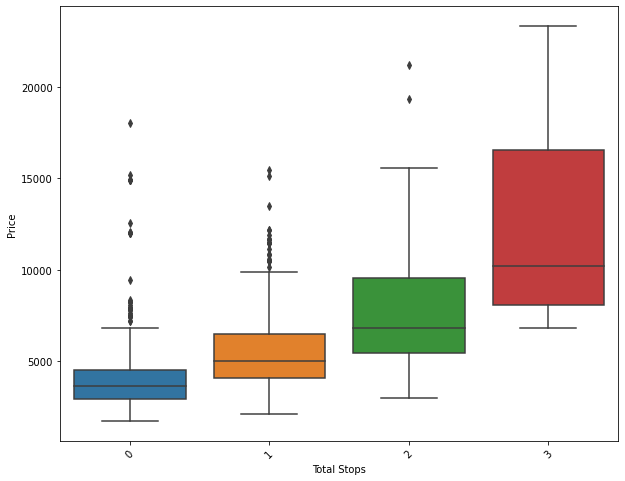

In [32]:
plt.figure(figsize=(10,8))
plt.xticks(rotation='45')
sns.boxplot(x='Total Stops',y='Price',data=df.sort_values('Price',ascending=False))

The price range for the flights with no stops is ranging between 1700 and 7000.

The price range for the flights with 1 stops is ranging between 1800 and 10000.

The price range for the flights with 2 stops is ranging between 2000 and 15300.

The price range for the flights with 3 stops is ranging between 7000 and above 20000.

It shows that as the number of total stops increases price also increases.

<AxesSubplot:xlabel='Total Stops', ylabel='Price'>

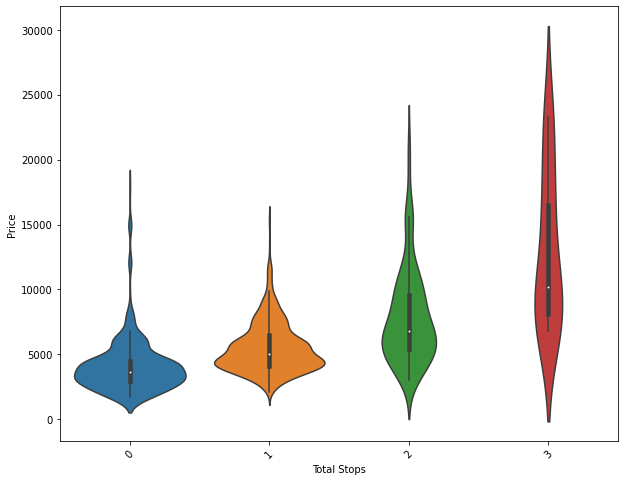

In [33]:
plt.figure(figsize=(10,8))
plt.xticks(rotation='45')
sns.violinplot(x='Total Stops',y='Price',data=df.sort_values('Price',ascending=False))

Majority of the price for the flights with no stops and 1 stop is in the range of 2000 and 6000.

For the flights with 2 stops majority price is in the range of 5000 and 8000.

For the flights with 3stops majority price is in the range of 6000 and 16000.

<AxesSubplot:xlabel='Day of Journey', ylabel='Price'>

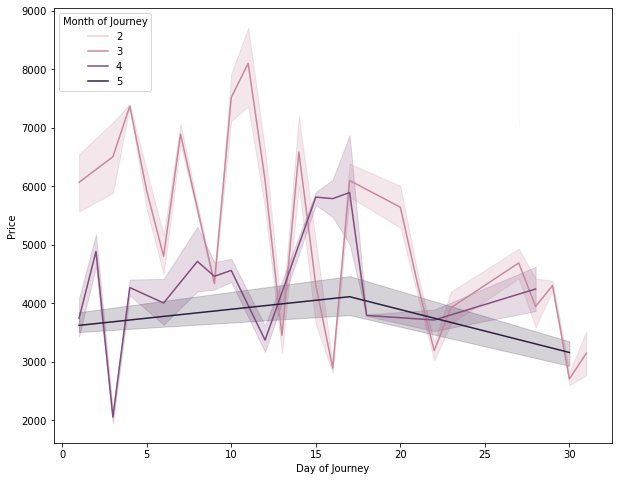

In [83]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Day of Journey',y='Price',hue='Month of Journey',data=df)

The price is high for the 3rd month compared to 4th and 5th months. The price increases when the departure date is near.

<AxesSubplot:xlabel='Dep-Hour', ylabel='Price'>

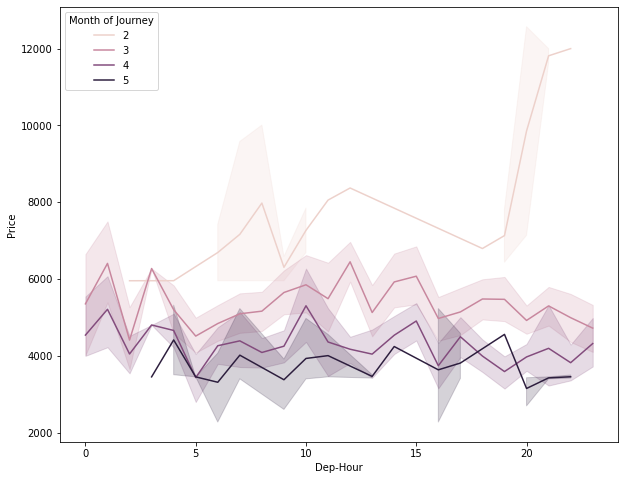

In [89]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Dep-Hour',y='Price',hue='Month of Journey',data=df)

The Price is changing over time.

<AxesSubplot:xlabel='Duration Hour', ylabel='Price'>

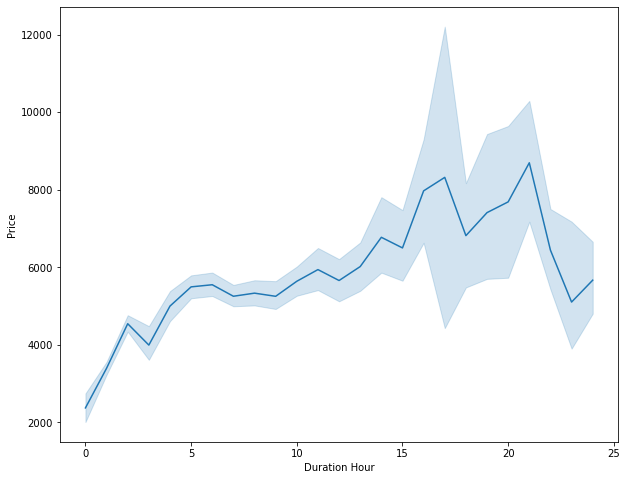

In [90]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Duration Hour',y='Price',data=df)

The price is increases with increase in Duration Hour.

In [34]:
#Continous data
con=df[['Total Stops','Price','Day of Journey','Month of Journey','Dep-Hour','Dep-Minute','Arrival-Hour','Arrival-Minute','Duration Hour','Duration Minute']]

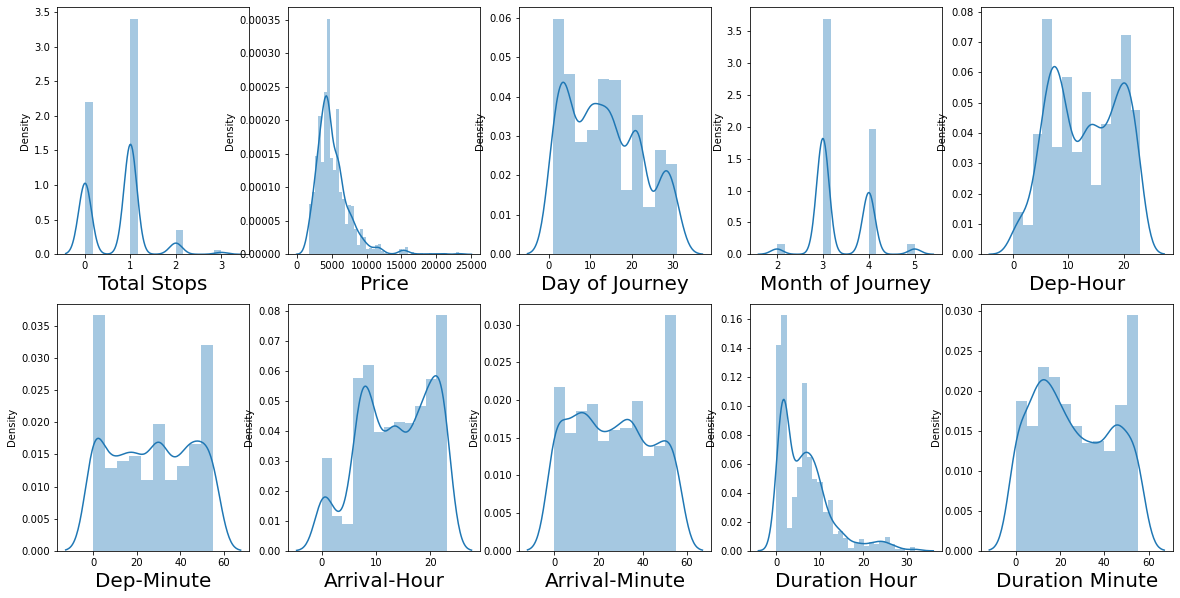

In [35]:
plt.figure(figsize=(20,10))
plotnumber=1

for i in con:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(con[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()


In [36]:
#Checking the skewness
df.skew()

Total Stops         0.526056
Price               2.200286
Day of Journey      0.327380
Month of Journey    0.573415
Dep-Hour           -0.051382
Dep-Minute         -0.011360
Arrival-Hour       -0.286866
Arrival-Minute      0.105843
Duration Hour       1.533913
Duration Minute     0.192167
dtype: float64

Skewness is not present.

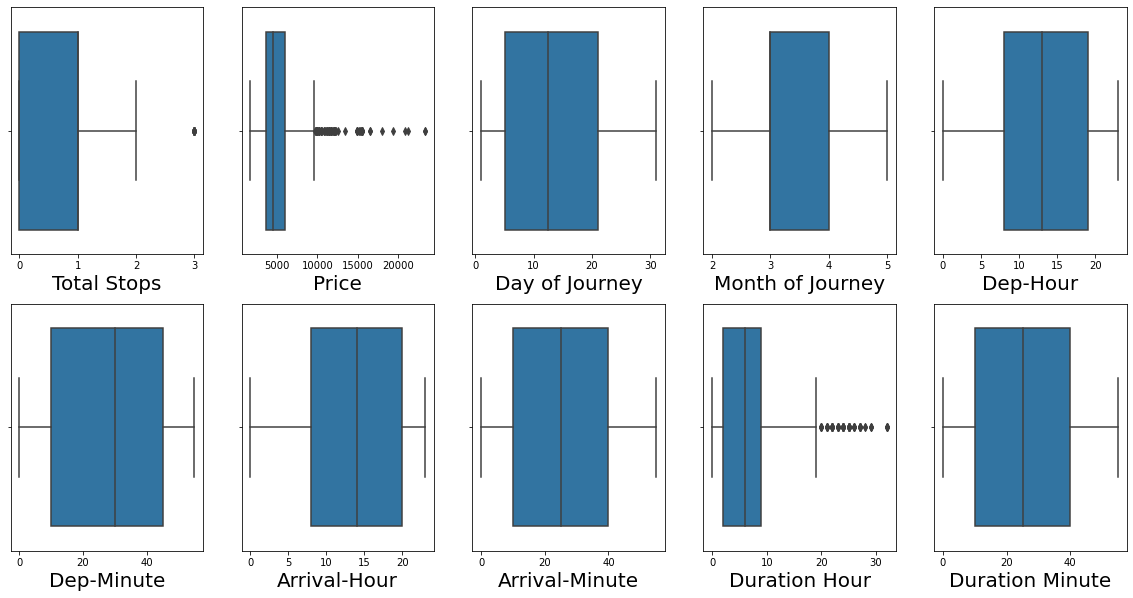

In [37]:
plt.figure(figsize=(20,10))
plotnumber=1

for i in con:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.boxplot(con[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

Outliers are present in Price and Duration Hour.

<AxesSubplot:xlabel='Total Stops', ylabel='Price'>

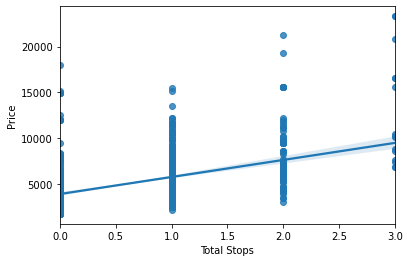

In [38]:
sns.regplot('Total Stops','Price',data=df)

Price and Total Stops has positive linear relation

<AxesSubplot:xlabel='Total Stops', ylabel='Duration Hour'>

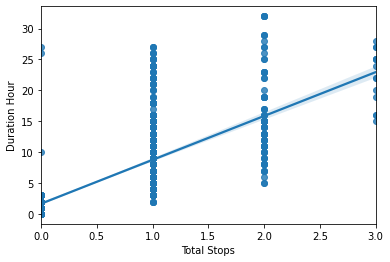

In [39]:
sns.regplot('Total Stops','Duration Hour',data=df)

Duration Hours and Total Stops has a positive linear relation.

<AxesSubplot:xlabel='Price', ylabel='Duration Hour'>

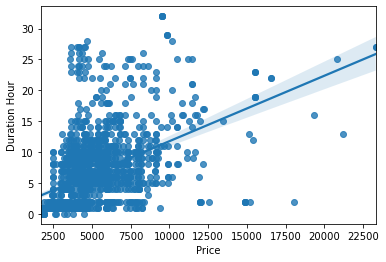

In [40]:
sns.regplot('Price','Duration Hour',data=df)

Price and Duration Hours has a positive linear relation

<AxesSubplot:xlabel='Price', ylabel='Day of Journey'>

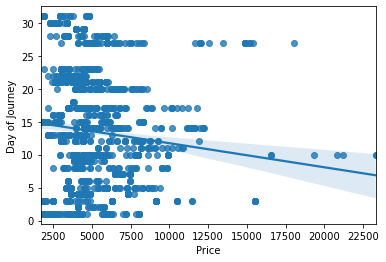

In [41]:
sns.regplot('Price','Day of Journey',data=df)

Price and Day of Journey has a negative linear relation.

<AxesSubplot:xlabel='Price', ylabel='Month of Journey'>

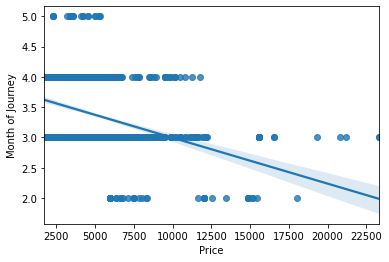

In [42]:
sns.regplot('Price','Month of Journey',data=df)

Price and Month of Journey has a negative linear relation.

<AxesSubplot:xlabel='Price', ylabel='Arrival-Hour'>

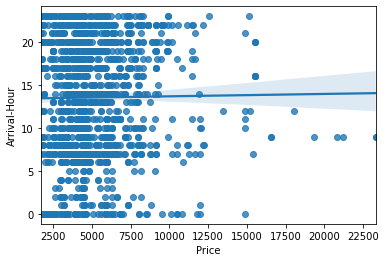

In [43]:
sns.regplot('Price','Arrival-Hour',data=df)

Price and Arrival-Hour has a weak relation.

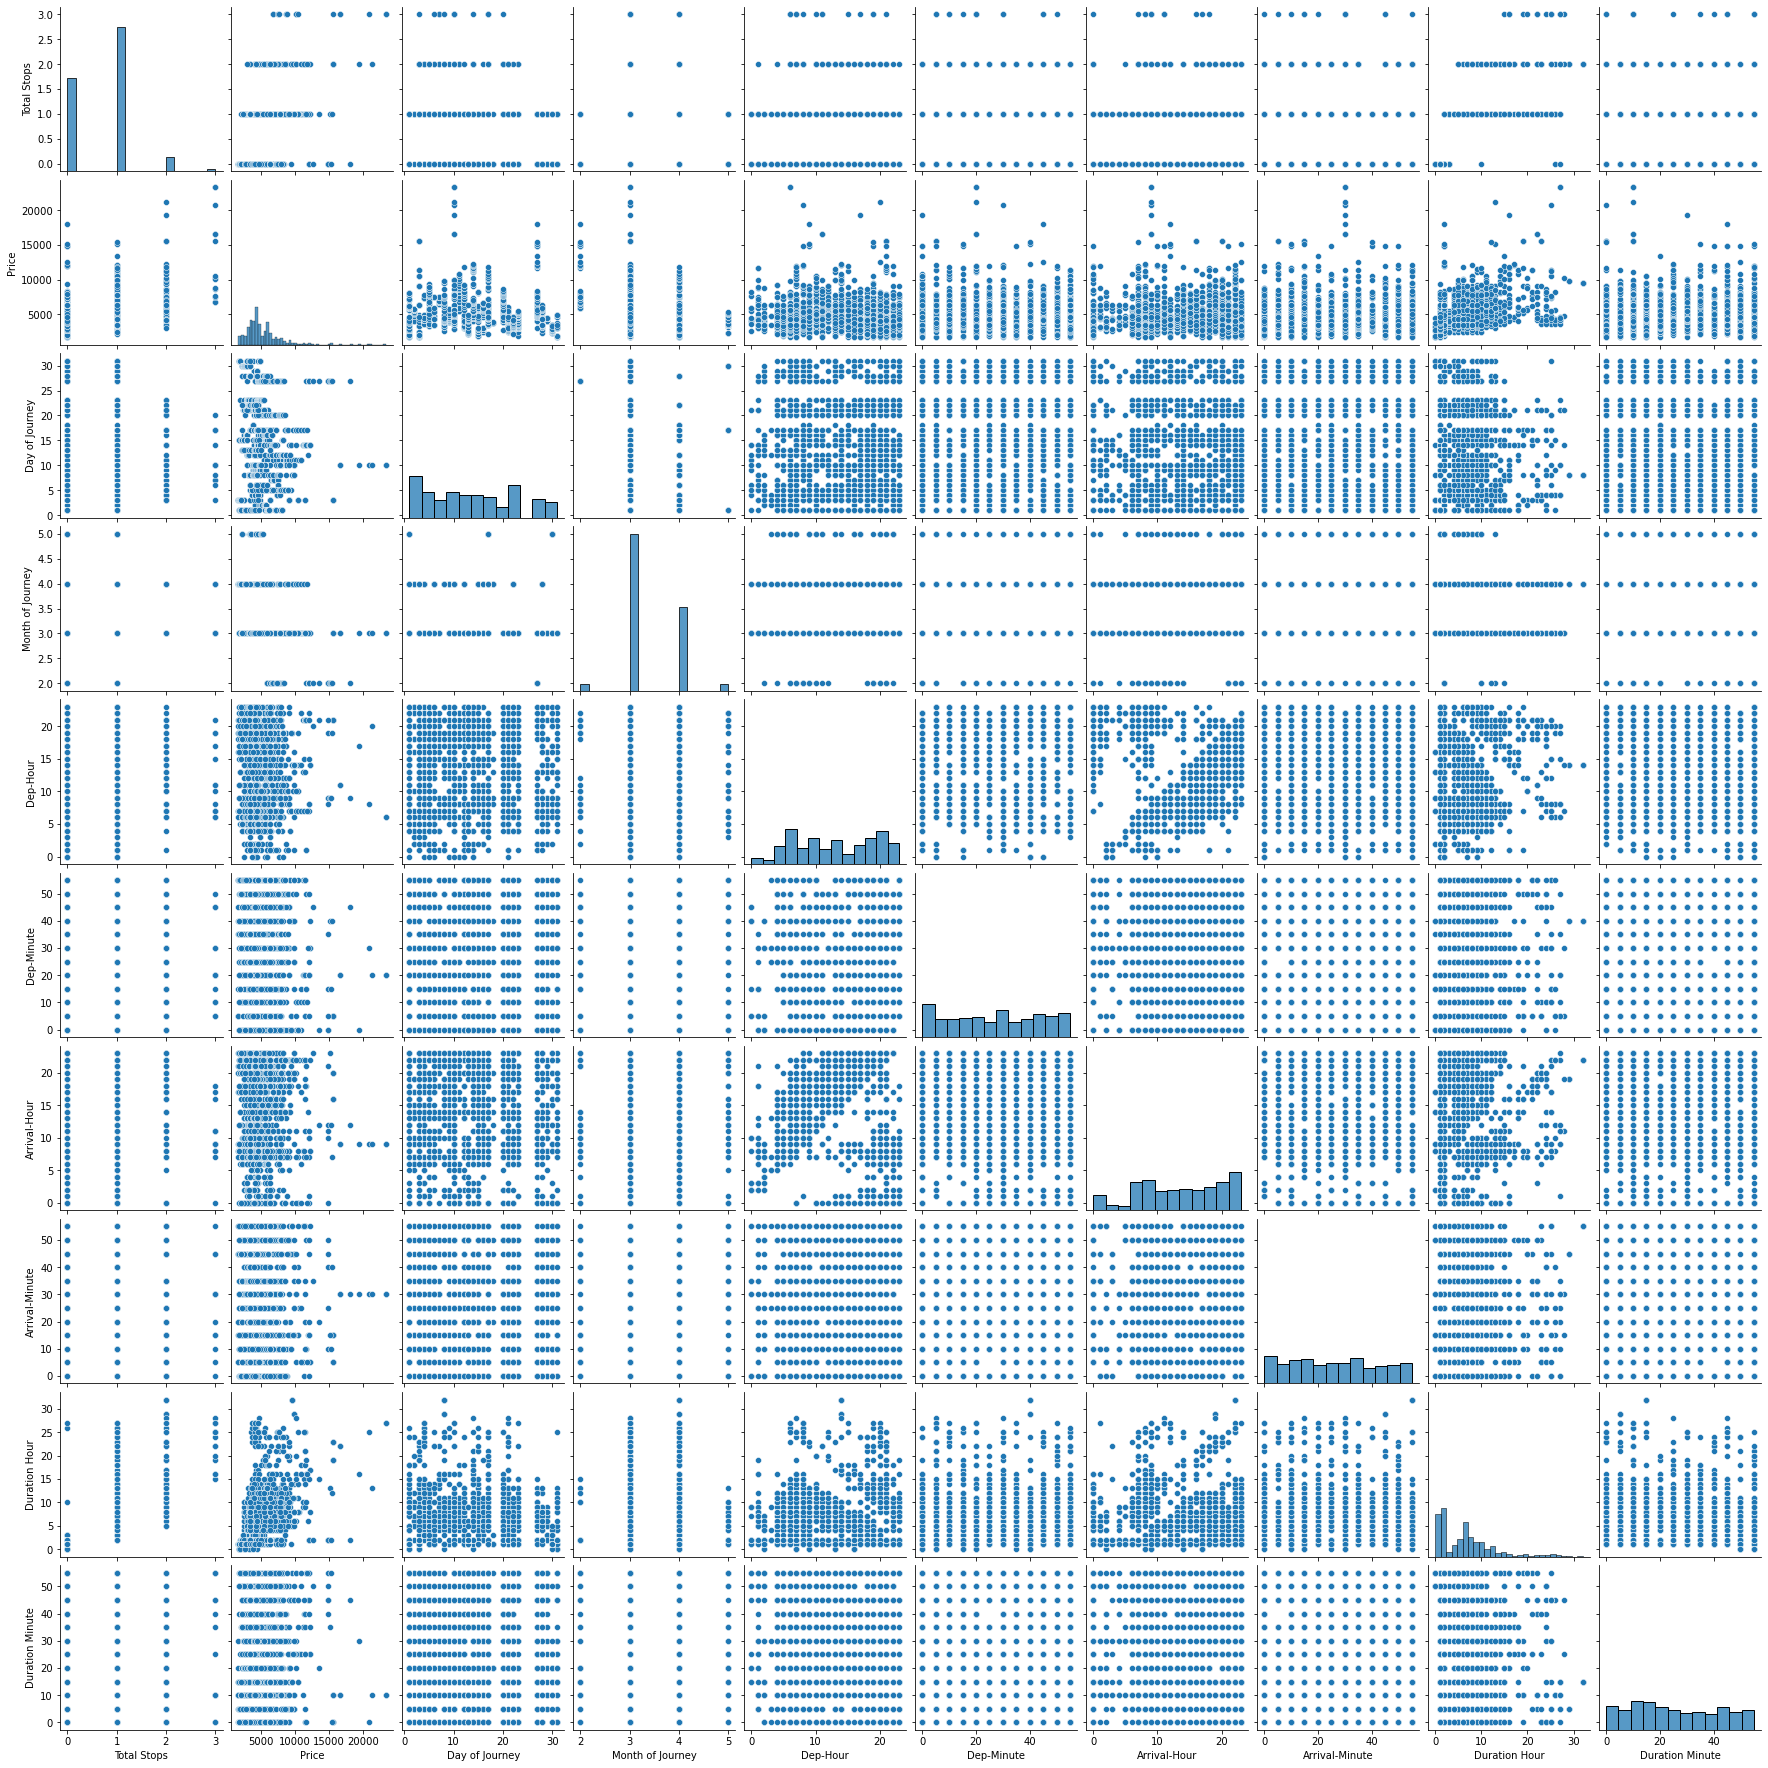

In [44]:
sns.pairplot(df)

In [45]:
df.dtypes

Airline             object
Source              object
Destination         object
Total Stops          int64
Price                int32
Day of Journey       int64
Month of Journey     int64
Dep-Hour             int64
Dep-Minute           int64
Arrival-Hour         int64
Arrival-Minute       int64
Duration Hour        int64
Duration Minute      int64
dtype: object

In [46]:
#Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
for i in df:
    if df[i].dtypes=='object':
        df[i]=Le.fit_transform(df[i])

In [47]:
df.head()

,Airline,Source,Destination,Total Stops,Price,Day of Journey,Month of Journey,Dep-Hour,Dep-Minute,Arrival-Hour,Arrival-Minute,Duration Hour,Duration Minute
0,9,10,10,0,5953,27,2,7,20,9,35,2,15
1,1,10,10,0,5955,27,2,7,0,9,5,2,5
2,13,10,10,0,5955,27,2,9,30,11,35,2,5
3,6,10,10,0,5955,27,2,2,0,4,10,2,10
4,6,10,10,0,5955,27,2,6,30,8,40,2,10


<AxesSubplot:>

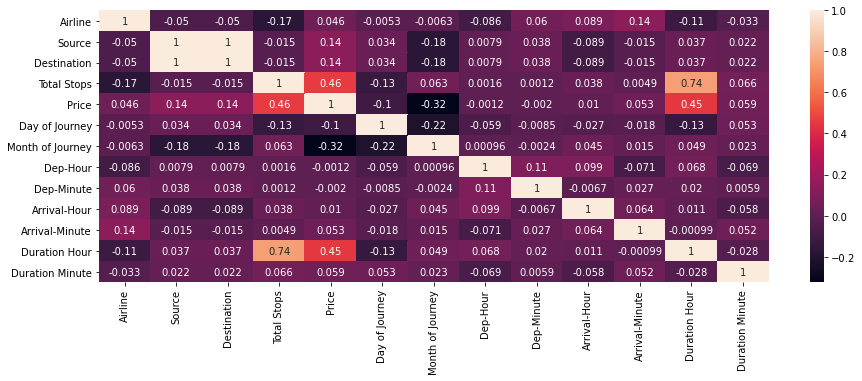

In [48]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

The Price is positively correlated to Airline,Source,Destination,Total_Stops,Arrival Hour,Arrival-minute,Duration Hour and Duration minute. The Price negatively correlated to Day of Journey,Month of Journey,Dep-Hour and Dep-Minute.

In [49]:
df.describe()

,Airline,Source,Destination,Total Stops,Price,Day of Journey,Month of Journey,Dep-Hour,Dep-Minute,Arrival-Hour,Arrival-Minute,Duration Hour,Duration Minute
count,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000
mean,4.973203,5.060784,5.060784,0.711111,5213.218954,13.480392,3.356209,12.981046,27.016340,13.550327,26.029412,6.699346,25.679739
std,3.602003,3.688966,3.688966,0.616065,2500.719910,8.798742,0.584779,6.227875,18.147614,6.650414,17.455047,5.918550,17.338304
min,0.000000,0.000000,0.000000,0.000000,1714.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,0.000000,3636.000000,5.000000,3.000000,8.000000,10.000000,8.000000,10.000000,2.000000,10.000000
50%,6.000000,5.000000,5.000000,1.000000,4514.000000,12.500000,3.000000,13.000000,30.000000,14.000000,25.000000,6.000000,25.000000
75%,6.000000,9.000000,9.000000,1.000000,6010.000000,21.000000,4.000000,19.000000,45.000000,20.000000,40.000000,9.000000,40.000000
max,13.000000,11.000000,11.000000,3.000000,23313.000000,31.000000,5.000000,23.000000,55.000000,23.000000,55.000000,32.000000,55.000000


All the columns are having 1530 data.

Mean is greater tha median in Price.

There is a difference between 75th percentile and max in Price and Duration Hour, so outliers will be present.

In [50]:
#Finding outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 139,  178,  313,  314,  411,  416,  417,  418,  419,  420,  421,
        422,  423,  424,  436,  436,  442,  451,  574,  593,  594,  595,
        596,  596,  597,  598,  599,  624,  624,  645,  663,  732,  758,
        784,  785,  789,  790,  793,  794,  798,  799,  819,  833,  834,
        835,  836,  837,  838,  839,  840,  841,  842, 1157, 1157, 1487,
       1490, 1493, 1493, 1495, 1505, 1505, 1506, 1506, 1507, 1508, 1508,
       1508, 1509, 1510, 1510, 1510, 1511, 1511, 1511], dtype=int64), array([11, 11,  3,  3, 11,  3, 11, 11, 11, 11, 11, 11, 11, 11,  3, 11, 11,
       11, 11,  4,  4,  4,  3,  4,  4,  4,  4,  3, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  3, 11,  3,  3,  3, 11, 11,  3,  4,  3,  4,  4,  3,  4, 11,  4,
        3,  4, 11,  3,  4, 11], dtype=int64))


In [51]:
#Removing the outliers
dfnew=df[(z<3).all(axis=1)]
print('dfnew.shape = ',dfnew.shape)
df=dfnew

dfnew.shape =  (1469, 13)


In [52]:
dataloss=((1670-1469)/1670)*100
dataloss

12.035928143712574

12% data loss after outlier removal.

In [53]:
# Separating dependent and independent variables

X=df.drop('Price',axis=1)
Y=df['Price']
print(X.shape)
print(Y.shape)

(1469, 12)
(1469,)


In [54]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
vif['Features']=X.columns
vif

,VIF,Features
0,3.061600,Airline
1,inf,Source
2,inf,Destination
3,5.582542,Total Stops
4,3.059664,Day of Journey
5,13.711865,Month of Journey
6,5.201280,Dep-Hour
7,3.229806,Dep-Minute
8,5.085517,Arrival-Hour
9,3.219656,Arrival-Minute


Multicollinearity in Source and Destination

In [55]:
X=X.drop('Source',axis=1)
X

,Airline,Destination,Total Stops,Day of Journey,Month of Journey,Dep-Hour,Dep-Minute,Arrival-Hour,Arrival-Minute,Duration Hour,Duration Minute
0,9,10,0,27,2,7,20,9,35,2,15
1,1,10,0,27,2,7,0,9,5,2,5
2,13,10,0,27,2,9,30,11,35,2,5
3,6,10,0,27,2,2,0,4,10,2,10
4,6,10,0,27,2,6,30,8,40,2,10
...,...,...,...,...,...,...,...,...,...,...,...
1665,6,1,0,1,3,13,5,14,10,1,5
1666,0,1,0,1,3,16,5,17,0,0,55
1667,6,1,0,1,3,14,30,15,40,1,10
1668,6,1,0,1,3,20,50,22,0,1,10


In [57]:
#Scaling dataponits using MinMaxscaler
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
X=scale.fit_transform(X)
X

array([[0.69230769, 0.90909091, 0.        , ..., 0.63636364, 0.08333333,
        0.27272727],
       [0.07692308, 0.90909091, 0.        , ..., 0.09090909, 0.08333333,
        0.09090909],
       [1.        , 0.90909091, 0.        , ..., 0.63636364, 0.08333333,
        0.09090909],
       ...,
       [0.46153846, 0.09090909, 0.        , ..., 0.72727273, 0.04166667,
        0.18181818],
       [0.46153846, 0.09090909, 0.        , ..., 0.        , 0.04166667,
        0.18181818],
       [0.46153846, 0.09090909, 0.        , ..., 0.09090909, 0.04166667,
        0.09090909]])

In [58]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

lr=LinearRegression()
ls=Lasso()
rd=Ridge()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gb=GradientBoostingRegressor()

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
#Linear
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.40537235542854055

In [60]:
predlr=lr.predict(x_test)
print('R2 score :',r2_score(y_test,predlr))
print('Mean squared error :',mean_squared_error(y_test,predlr))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predlr)))

R2 score : 0.4016293075985139
Mean squared error : 2718441.8318753424
Root Mean squared error  : 1648.7697934749237


In [61]:
#Lasso
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.40533202484388375

In [62]:
predls=ls.predict(x_test)
print('R2 score :',r2_score(y_test,predls))
print('Mean squared error :',mean_squared_error(y_test,predls))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predls)))

R2 score : 0.40114723055553947
Mean squared error : 2720631.943149925
Root Mean squared error  : 1649.4338250290386


In [63]:
#Ridge
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.4052356850619916

In [64]:
predrd=rd.predict(x_test)
print('R2 score :',r2_score(y_test,predrd))
print('Mean squared error :',mean_squared_error(y_test,predrd))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrd)))

R2 score : 0.40024288297376553
Mean squared error : 2724740.460375231
Root Mean squared error  : 1650.6787877643642


In [65]:
#Decision tree
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.998392910253118

In [66]:
preddt=dt.predict(x_test)
print('R2 score :',r2_score(y_test,preddt))
print('Mean squared error :',mean_squared_error(y_test,preddt))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,preddt)))

R2 score : 0.683766660375437
Mean squared error : 1436671.1972789115
Root Mean squared error  : 1198.6121963666612


In [67]:
#Random forest
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9700798871013958

In [68]:
predrf=rf.predict(x_test)
print('R2 score :',r2_score(y_test,predrf))
print('Mean squared error :',mean_squared_error(y_test,predrf))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrf)))

R2 score : 0.8077241737592615
Mean squared error : 873523.1453490215
Root Mean squared error  : 934.6246012967033


In [69]:
#AdaBoost
ad.fit(x_train,y_train)
ad.score(x_train,y_train)

0.5501902589323036

In [70]:
predad=ad.predict(x_test)
print('R2 score :',r2_score(y_test,predad))
print('Mean squared error :',mean_squared_error(y_test,predad))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predad)))

R2 score : 0.48537300789383486
Mean squared error : 2337988.0748151867
Root Mean squared error  : 1529.048094343401


In [71]:
#GradientBoost
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.8090564842150598

In [72]:
predgb=gb.predict(x_test)
print('R2 score :',r2_score(y_test,predgb))
print('Mean squared error :',mean_squared_error(y_test,predgb))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predgb)))

R2 score : 0.6868628633482969
Mean squared error : 1422604.9206576096
Root Mean squared error  : 1192.7300284044204


Hyperparameter Tuning

In [73]:
#DTR
grid_para={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
           'splitter':['best','random'],
           'max_depth':range(1,20,2),
           'min_samples_split':range(2,20,1),
           'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(estimator=dt,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(1, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [74]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'friedman_mse', 'max_depth': 19, 'max_features': 'auto', 'min_samples_split': 15, 'splitter': 'best'}


In [75]:
dt=DecisionTreeRegressor(splitter='best',
                         min_samples_split=15,
                         max_features='auto',
                         max_depth=19,
                         criterion='friedman_mse')
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('R2 score :',r2_score(y_test,preddt))
print('Mean squared error :',mean_squared_error(y_test,preddt))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,preddt)))

R2 score : 0.7126295664983515
Mean squared error : 1305544.9031766327
Root Mean squared error  : 1142.6044386298493


In [76]:
#Random Forest
grid_para={'criterion':['squared_error','absolute_error','poisson'],
           'min_samples_split':[1,5,10,15],
           'min_samples_leaf':[1,5,10,15],
           'max_depth':range(2,20,2),
           'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=rf,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': range(2, 20, 2),
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [1, 5, 10, 15]})

In [77]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'poisson', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 10}


In [78]:
rf=RandomForestRegressor(min_samples_split=10,
                         min_samples_leaf=5,
                         max_features='auto',
                         max_depth=18,
                         criterion='poisson')
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('R2 score :',r2_score(y_test,predrf))
print('Mean squared error :',mean_squared_error(y_test,predrf))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrf)))

R2 score : 0.3760767155162268
Mean squared error : 2834529.127111267
Root Mean squared error  : 1683.605989271619


In [79]:
#GradientBoost
grid_para={'learning_rate':[0.001,0.01,0.1,1.0,1.5],
           'max_features': ['auto','log2','sqrt'],
           'loss':['squared_error','absolute_error','huber','quantile'],
           'criterion':['squared_error','friedman_mse','mse','mae']}
grid_search=GridSearchCV(estimator=gb,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse', 'mse',
                                       'mae'],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'log2', 'sqrt']})

In [80]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'huber', 'max_features': 'auto'}


In [81]:
gb=GradientBoostingRegressor(max_features='auto',
                             loss='huber',
                             learning_rate=0.1,
                             criterion='mse')
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('R2 score :',r2_score(y_test,predgb))
print('Mean squared error :',mean_squared_error(y_test,predgb))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predgb)))

R2 score : 0.6778033096950682
Mean squared error : 1463763.1356935352
Root Mean squared error  : 1209.8607918655498


Decision Tree Regressor is the best model with R2 score of 71.26%.

In [91]:
import pickle
filename="Flight_Price_Prediction.pkl"
pickle.dump(dt,open(filename, 'wb'))

Conclusion

In [92]:
model=pickle.load(open("Flight_Price_Prediction.pkl",'rb'))
result=model.score(x_test,y_test)
print('The R2 score of the model : ',result*100)

The R2 score of the model :  71.26295664983515
